In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn

print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('seaborn version:', sns.__version__)
print(f"matplotlib: mpl {plt.matplotlib.__version__}")
print('sklearn version:', sklearn.__version__)

font_path = "c:/Windows/Fonts/malgun.ttf"
font_prop = mpl.font_manager.FontProperties(fname=font_path)
mpl.rcParams['font.family'] = font_prop.get_name()
mpl.rcParams['axes.unicode_minus'] = False

numpy version: 2.1.0
pandas version: 2.2.2
seaborn version: 0.13.2
matplotlib: mpl 3.9.2
sklearn version: 1.5.1


In [2]:
raw_data23 = pd.read_csv('accidentInfoList21-23.csv')
raw_data20 = pd.read_csv('accidentInfoList18-20.csv')
raw_data17 = pd.read_csv('accidentInfoList15-17.csv')
raw_data14 = pd.read_csv('accidentInfoList14.csv')

In [6]:
raw_data14.head()

,"검색조건 - 사고년도:2014~2014; 사고지역:서울특별시 :: 전체 :: ; 사고내용:사망사고, 중상사고, 경상사고, 부상신고; 음주운전 사고",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
1,2014010100100005,2014년 1월 1일 00시,수요일,서울특별시 구로구 오류동,부상신고사고,0,0,0,2,차대차 - 기타,...,맑음,단일로 - 기타,승용,남,31세,상해없음,승용,남,65세,부상신고
2,2014010100100029,2014년 1월 1일 01시,수요일,서울특별시 성동구 마장동,중상사고,0,1,3,0,차대차 - 기타,...,맑음,단일로 - 기타,승용,남,32세,상해없음,승용,남,54세,중상
3,2014010100100050,2014년 1월 1일 02시,수요일,서울특별시 광진구 광장동,중상사고,0,1,0,4,차대차 - 추돌 - 진행중,...,맑음,단일로 - 기타,승용,남,26세,상해없음,승용,여,26세,부상신고
4,2014010100100053,2014년 1월 1일 02시,수요일,서울특별시 구로구 개봉동,경상사고,0,0,2,0,차대차 - 기타,...,맑음,단일로 - 기타,승용,남,29세,상해없음,승용,남,25세,경상


In [7]:
# 첫 줄 삭제
data14 = raw_data14.copy()
data14.columns = data14.iloc[0]
data14 = data14.drop(index=0).reset_index(drop=True)

In [9]:
data17 = raw_data17.copy()
data17.columns = data17.iloc[0]
data17 = data17.drop(index=0).reset_index(drop=True)
data20 = raw_data20.copy()
data20.columns = data20.iloc[0]
data20 = data20.drop(index=0).reset_index(drop=True)
data23 = raw_data23.copy()
data23.columns = data23.iloc[0]
data23 = data23.drop(index=0).reset_index(drop=True)

In [10]:
# 4개의 데이터프레임을 하나로 합치기
data = pd.concat([data14, data17, data20, data23], ignore_index=True)


In [11]:
data.head()

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
0,2014010100100005,2014년 1월 1일 00시,수요일,서울특별시 구로구 오류동,부상신고사고,0,0,0,2,차대차 - 기타,...,맑음,단일로 - 기타,승용,남,31세,상해없음,승용,남,65세,부상신고
1,2014010100100029,2014년 1월 1일 01시,수요일,서울특별시 성동구 마장동,중상사고,0,1,3,0,차대차 - 기타,...,맑음,단일로 - 기타,승용,남,32세,상해없음,승용,남,54세,중상
2,2014010100100050,2014년 1월 1일 02시,수요일,서울특별시 광진구 광장동,중상사고,0,1,0,4,차대차 - 추돌 - 진행중,...,맑음,단일로 - 기타,승용,남,26세,상해없음,승용,여,26세,부상신고
3,2014010100100053,2014년 1월 1일 02시,수요일,서울특별시 구로구 개봉동,경상사고,0,0,2,0,차대차 - 기타,...,맑음,단일로 - 기타,승용,남,29세,상해없음,승용,남,25세,경상
4,2014010100100054,2014년 1월 1일 02시,수요일,서울특별시 양천구 목동,경상사고,0,0,2,0,차대차 - 측면직각충돌,...,맑음,교차로 - 교차로안,승용,여,42세,상해없음,승용,남,37세,경상


In [12]:
data.to_csv('accident.csv', index=False)

### 데이터 전처리
 * '사고 번호' 열 삭제
 * '사고 일시' ->datatime으로 변경
 * '사고 일시' -> 일자와 시간 열로
 * '시군구' 열 삭제
 * '사고 내용' 삭제
 * 사망자 수, 중상자 수, 경상자 수, 부상신고자 수 열 삭제
 * 사고 유형 split
 * 법규위반 열 삭제
 * 도로형태 split
 * 가해운전자 차종 승용 = 승용+승합, 화물 = 화물+건설기계, 보행자, 이륜 = 원동기+이륜차, 자전거 = 자전거 + 킥보드 만 남기기
 * 가해운전자 성별 열 삭제
 * 가해운전자 나이 숫자만 남기기 + int형으로
 * 피해운전자 차종 승용 = 승용+승합, 화물 = 화물+건설기계, 보행자, 이륜 = 원동기+이륜차, 자전거 = 자전거 + 킥보드 만 남기기
 * 피해운전자 상해정도 기타불명, 미분류 삭제
 * csv 파일 생성
 * 범주형 데이터들 모두 숫자로 변경

In [306]:
data = pd.read_csv('accident.csv')

In [307]:
data = data.drop(columns=['사고번호', '시군구', '사고내용', '사망자수', '중상자수', '경상자수', '부상신고자수', '법규위반', '가해운전자 성별'])

In [308]:
data.head()

,사고일시,요일,사고유형,노면상태,기상상태,도로형태,가해운전자 차종,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
0,2014년 1월 1일 00시,수요일,차대차 - 기타,건조,맑음,단일로 - 기타,승용,31세,상해없음,승용,남,65세,부상신고
1,2014년 1월 1일 01시,수요일,차대차 - 기타,기타,맑음,단일로 - 기타,승용,32세,상해없음,승용,남,54세,중상
2,2014년 1월 1일 02시,수요일,차대차 - 추돌 - 진행중,건조,맑음,단일로 - 기타,승용,26세,상해없음,승용,여,26세,부상신고
3,2014년 1월 1일 02시,수요일,차대차 - 기타,건조,맑음,단일로 - 기타,승용,29세,상해없음,승용,남,25세,경상
4,2014년 1월 1일 02시,수요일,차대차 - 측면직각충돌,건조,맑음,교차로 - 교차로안,승용,42세,상해없음,승용,남,37세,경상


In [309]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26270 entries, 0 to 26269
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   사고일시        26270 non-null  object
 1   요일          26270 non-null  object
 2   사고유형        26270 non-null  object
 3   노면상태        26270 non-null  object
 4   기상상태        26270 non-null  object
 5   도로형태        26270 non-null  object
 6   가해운전자 차종    26270 non-null  object
 7   가해운전자 연령    26270 non-null  object
 8   가해운전자 상해정도  26270 non-null  object
 9   피해운전자 차종    24900 non-null  object
 10  피해운전자 성별    24900 non-null  object
 11  피해운전자 연령    24900 non-null  object
 12  피해운전자 상해정도  24900 non-null  object
dtypes: object(13)
memory usage: 2.6+ MB


In [310]:
data['사고일시'] = pd.to_datetime(data['사고일시'], format='%Y년 %m월 %d일 %H시')
data['사고날짜'] = data['사고일시'].dt.date
data['사고시간'] = data['사고일시'].dt.time

In [311]:
data.head()

,사고일시,요일,사고유형,노면상태,기상상태,도로형태,가해운전자 차종,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사고날짜,사고시간
0,2014-01-01 00:00:00,수요일,차대차 - 기타,건조,맑음,단일로 - 기타,승용,31세,상해없음,승용,남,65세,부상신고,2014-01-01,00:00:00
1,2014-01-01 01:00:00,수요일,차대차 - 기타,기타,맑음,단일로 - 기타,승용,32세,상해없음,승용,남,54세,중상,2014-01-01,01:00:00
2,2014-01-01 02:00:00,수요일,차대차 - 추돌 - 진행중,건조,맑음,단일로 - 기타,승용,26세,상해없음,승용,여,26세,부상신고,2014-01-01,02:00:00
3,2014-01-01 02:00:00,수요일,차대차 - 기타,건조,맑음,단일로 - 기타,승용,29세,상해없음,승용,남,25세,경상,2014-01-01,02:00:00
4,2014-01-01 02:00:00,수요일,차대차 - 측면직각충돌,건조,맑음,교차로 - 교차로안,승용,42세,상해없음,승용,남,37세,경상,2014-01-01,02:00:00


In [312]:
data['사고유형'] = data['사고유형'].apply(lambda x: x.split()[0])

In [313]:
data.head(1)

,사고일시,요일,사고유형,노면상태,기상상태,도로형태,가해운전자 차종,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사고날짜,사고시간
0,2014-01-01,수요일,차대차,건조,맑음,단일로 - 기타,승용,31세,상해없음,승용,남,65세,부상신고,2014-01-01,00:00:00


In [314]:
data['사고유형'].value_counts()

사고유형
차대차     22510
차대사람     2322
차량단독     1438
Name: count, dtype: int64

In [315]:
data['도로형태'] = data['도로형태'].apply(lambda x: x.split()[0])

In [316]:
data.head(1)

,사고일시,요일,사고유형,노면상태,기상상태,도로형태,가해운전자 차종,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사고날짜,사고시간
0,2014-01-01,수요일,차대차,건조,맑음,단일로,승용,31세,상해없음,승용,남,65세,부상신고,2014-01-01,00:00:00


In [317]:
data['도로형태'].value_counts()

도로형태
단일로    15593
교차로     9419
기타      1154
미분류       75
주차장       29
Name: count, dtype: int64

In [318]:
data['가해운전자 차종'] = data['가해운전자 차종'].replace('승합', '승용')
data['가해운전자 차종'] = data['가해운전자 차종'].replace('건설기계', '화물')
data['가해운전자 차종'] = data['가해운전자 차종'].replace('원동기', '이륜')
data['가해운전자 차종'] = data['가해운전자 차종'].replace('개인형이동수단(PM)', '자전거')

valid = ['승용', '화물', '보행자', '이륜', '자전거']
data = data[data['가해운전자 차종'].isin(valid)]


In [319]:
data['사고유형'].value_counts()

사고유형
차대차     22500
차대사람     2321
차량단독     1433
Name: count, dtype: int64

In [320]:
data['피해운전자 차종'] = data['피해운전자 차종'].replace('승합', '승용')
data['피해운전자 차종'] = data['피해운전자 차종'].replace('건설기계', '화물')
data['피해운전자 차종'] = data['피해운전자 차종'].replace('원동기', '이륜')
data['피해운전자 차종'] = data['피해운전자 차종'].replace('개인형이동수단(PM)', '자전거')

data = data[~data['피해운전자 차종'].isin(['특수', '기타불명','사륜오토바이(ATV)','농기계'])]

In [321]:
data['사고유형'].value_counts()

사고유형
차대차     22439
차대사람     2321
차량단독     1433
Name: count, dtype: int64

In [322]:
data['가해운전자 연령'] = data['가해운전자 연령'].str.extract(r'(\d+)').astype(int)

In [323]:
data.head()

,사고일시,요일,사고유형,노면상태,기상상태,도로형태,가해운전자 차종,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사고날짜,사고시간
0,2014-01-01 00:00:00,수요일,차대차,건조,맑음,단일로,승용,31,상해없음,승용,남,65세,부상신고,2014-01-01,00:00:00
1,2014-01-01 01:00:00,수요일,차대차,기타,맑음,단일로,승용,32,상해없음,승용,남,54세,중상,2014-01-01,01:00:00
2,2014-01-01 02:00:00,수요일,차대차,건조,맑음,단일로,승용,26,상해없음,승용,여,26세,부상신고,2014-01-01,02:00:00
3,2014-01-01 02:00:00,수요일,차대차,건조,맑음,단일로,승용,29,상해없음,승용,남,25세,경상,2014-01-01,02:00:00
4,2014-01-01 02:00:00,수요일,차대차,건조,맑음,교차로,승용,42,상해없음,승용,남,37세,경상,2014-01-01,02:00:00


In [324]:
data['피해운전자 연령'] = data['피해운전자 연령'].astype(str).str.extract(r'(\d+)').astype(float)

In [325]:
data = data[~data['피해운전자 상해정도'].isin(['기타불명', '미분류'])]

In [326]:
data['사고유형'].value_counts()

사고유형
차대차     22114
차대사람     2321
차량단독     1365
Name: count, dtype: int64

In [327]:
data['피해운전자 상해정도'].value_counts()

피해운전자 상해정도
경상      17039
중상       4722
상해없음     1913
부상신고      668
사망         93
Name: count, dtype: int64

In [328]:
data = data[~data['가해운전자 상해정도'].isin(['기타불명'])]

In [329]:
data['가해운전자 상해정도'].value_counts()

가해운전자 상해정도
상해없음    22327
경상       1156
부상신고      914
중상        699
사망        109
Name: count, dtype: int64

In [330]:
data['사고유형'].value_counts()

사고유형
차대차     21586
차대사람     2267
차량단독     1352
Name: count, dtype: int64

In [331]:
data['가해운전자 차종'].value_counts()

가해운전자 차종
승용     20711
이륜      2700
화물      1358
자전거      436
Name: count, dtype: int64

In [332]:
data['피해운전자 차종'].value_counts()

피해운전자 차종
승용     18751
보행자     2268
이륜      1372
화물      1208
자전거      254
Name: count, dtype: int64

In [333]:
data['도로형태'].value_counts()

도로형태
단일로    14927
교차로     9095
기타      1084
미분류       72
주차장       27
Name: count, dtype: int64

In [334]:
valid_road = ['단일로','교차로', '주차장']
data = data[data['도로형태'].isin(valid_road)]
data = data[data['도로형태'].isin(valid_road)]

In [335]:
data['도로형태'].value_counts()

도로형태
단일로    14927
교차로     9095
주차장       27
Name: count, dtype: int64

In [336]:
data['노면상태'].value_counts()

노면상태
건조       20523
젖음/습기     1788
습기        1149
기타         459
적설          63
서리/결빙       43
결빙          22
침수           1
해빙           1
Name: count, dtype: int64

In [337]:
data['기상상태'].value_counts()

기상상태
맑음    19943
비      2181
흐림     1385
기타      380
눈       155
안개        5
Name: count, dtype: int64

In [338]:
data = data[~data['노면상태'].isin(['침수', '해빙'])]

In [339]:
data['노면상태'].value_counts()

노면상태
건조       20523
젖음/습기     1788
습기        1149
기타         459
적설          63
서리/결빙       43
결빙          22
Name: count, dtype: int64

In [340]:
data['가해운전자 연령'].value_counts()

가해운전자 연령
29    851
31    842
30    819
32    810
33    798
     ... 
76     11
77      9
80      4
78      2
79      2
Name: count, Length: 62, dtype: int64

In [341]:
data.to_csv('not_cate_data.csv', index=False)

In [342]:
data.to_csv('not_cate_data_kor.csv', index=False, encoding='cp949')

### 데이터 전처리 - 원/핫 인코딩

In [410]:
data = pd.read_csv('not_cate_data.csv')

In [411]:
data = pd.get_dummies(data, columns=['요일'])

In [412]:
data.head()

,사고일시,사고유형,노면상태,기상상태,도로형태,가해운전자 차종,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,...,피해운전자 상해정도,사고날짜,사고시간,요일_금요일,요일_목요일,요일_수요일,요일_월요일,요일_일요일,요일_토요일,요일_화요일
0,2014-01-01 00:00:00,차대차,건조,맑음,단일로,승용,31,상해없음,승용,남,...,부상신고,2014-01-01,00:00:00,False,False,True,False,False,False,False
1,2014-01-01 01:00:00,차대차,기타,맑음,단일로,승용,32,상해없음,승용,남,...,중상,2014-01-01,01:00:00,False,False,True,False,False,False,False
2,2014-01-01 02:00:00,차대차,건조,맑음,단일로,승용,26,상해없음,승용,여,...,부상신고,2014-01-01,02:00:00,False,False,True,False,False,False,False
3,2014-01-01 02:00:00,차대차,건조,맑음,단일로,승용,29,상해없음,승용,남,...,경상,2014-01-01,02:00:00,False,False,True,False,False,False,False
4,2014-01-01 02:00:00,차대차,건조,맑음,교차로,승용,42,상해없음,승용,남,...,경상,2014-01-01,02:00:00,False,False,True,False,False,False,False


In [413]:
data['사고일시'] = pd.to_datetime(data['사고일시'])

In [414]:
data['년'] = data['사고일시'].dt.year
data['월'] = data['사고일시'].dt.month
data['일'] = data['사고일시'].dt.day
data['시간'] = data['사고일시'].dt.hour

In [415]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24047 entries, 0 to 24046
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   사고일시        24047 non-null  datetime64[ns]
 1   사고유형        24047 non-null  object        
 2   노면상태        24047 non-null  object        
 3   기상상태        24047 non-null  object        
 4   도로형태        24047 non-null  object        
 5   가해운전자 차종    24047 non-null  object        
 6   가해운전자 연령    24047 non-null  int64         
 7   가해운전자 상해정도  24047 non-null  object        
 8   피해운전자 차종    22772 non-null  object        
 9   피해운전자 성별    22772 non-null  object        
 10  피해운전자 연령    22772 non-null  float64       
 11  피해운전자 상해정도  22772 non-null  object        
 12  사고날짜        24047 non-null  object        
 13  사고시간        24047 non-null  object        
 14  요일_금요일      24047 non-null  bool          
 15  요일_목요일      24047 non-null  bool          
 16  요일_수요일      24047 non-

In [416]:
data = data.drop('사고날짜', axis=1)

In [417]:
data = data.drop('사고시간', axis=1)

In [418]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24047 entries, 0 to 24046
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   사고일시        24047 non-null  datetime64[ns]
 1   사고유형        24047 non-null  object        
 2   노면상태        24047 non-null  object        
 3   기상상태        24047 non-null  object        
 4   도로형태        24047 non-null  object        
 5   가해운전자 차종    24047 non-null  object        
 6   가해운전자 연령    24047 non-null  int64         
 7   가해운전자 상해정도  24047 non-null  object        
 8   피해운전자 차종    22772 non-null  object        
 9   피해운전자 성별    22772 non-null  object        
 10  피해운전자 연령    22772 non-null  float64       
 11  피해운전자 상해정도  22772 non-null  object        
 12  요일_금요일      24047 non-null  bool          
 13  요일_목요일      24047 non-null  bool          
 14  요일_수요일      24047 non-null  bool          
 15  요일_월요일      24047 non-null  bool          
 16  요일_일요일      24047 non-

In [419]:
data = pd.get_dummies(data, columns=['사고유형'])
data = pd.get_dummies(data, columns=['노면상태'])
data = pd.get_dummies(data, columns=['기상상태'])
data = pd.get_dummies(data, columns=['도로형태'])
data = pd.get_dummies(data, columns=['가해운전자 차종'])
data = pd.get_dummies(data, columns=['피해운전자 차종'])
data = pd.get_dummies(data, columns=['피해운전자 성별'])

In [420]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24047 entries, 0 to 24046
Data columns (total 46 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   사고일시          24047 non-null  datetime64[ns]
 1   가해운전자 연령      24047 non-null  int64         
 2   가해운전자 상해정도    24047 non-null  object        
 3   피해운전자 연령      22772 non-null  float64       
 4   피해운전자 상해정도    22772 non-null  object        
 5   요일_금요일        24047 non-null  bool          
 6   요일_목요일        24047 non-null  bool          
 7   요일_수요일        24047 non-null  bool          
 8   요일_월요일        24047 non-null  bool          
 9   요일_일요일        24047 non-null  bool          
 10  요일_토요일        24047 non-null  bool          
 11  요일_화요일        24047 non-null  bool          
 12  년             24047 non-null  int32         
 13  월             24047 non-null  int32         
 14  일             24047 non-null  int32         
 15  시간            24047 non-null  int32 

In [421]:
data['피해운전자 연령'] = data['피해운전자 연령'].fillna(data['가해운전자 연령'])
data['피해운전자 상해정도'] = data['피해운전자 상해정도'].fillna(data['가해운전자 상해정도'])

In [422]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24047 entries, 0 to 24046
Data columns (total 46 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   사고일시          24047 non-null  datetime64[ns]
 1   가해운전자 연령      24047 non-null  int64         
 2   가해운전자 상해정도    24047 non-null  object        
 3   피해운전자 연령      24047 non-null  float64       
 4   피해운전자 상해정도    24047 non-null  object        
 5   요일_금요일        24047 non-null  bool          
 6   요일_목요일        24047 non-null  bool          
 7   요일_수요일        24047 non-null  bool          
 8   요일_월요일        24047 non-null  bool          
 9   요일_일요일        24047 non-null  bool          
 10  요일_토요일        24047 non-null  bool          
 11  요일_화요일        24047 non-null  bool          
 12  년             24047 non-null  int32         
 13  월             24047 non-null  int32         
 14  일             24047 non-null  int32         
 15  시간            24047 non-null  int32 

In [424]:
from sklearn.preprocessing import LabelEncoder

# '사고유형' 열을 레이블 인코딩
label_encoder = LabelEncoder()
data['피해운전자 상해정도'] = label_encoder.fit_transform(data['가해운전자 상해정도'])

In [425]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24047 entries, 0 to 24046
Data columns (total 46 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   사고일시          24047 non-null  datetime64[ns]
 1   가해운전자 연령      24047 non-null  int64         
 2   가해운전자 상해정도    24047 non-null  object        
 3   피해운전자 연령      24047 non-null  float64       
 4   피해운전자 상해정도    24047 non-null  int64         
 5   요일_금요일        24047 non-null  bool          
 6   요일_목요일        24047 non-null  bool          
 7   요일_수요일        24047 non-null  bool          
 8   요일_월요일        24047 non-null  bool          
 9   요일_일요일        24047 non-null  bool          
 10  요일_토요일        24047 non-null  bool          
 11  요일_화요일        24047 non-null  bool          
 12  년             24047 non-null  int32         
 13  월             24047 non-null  int32         
 14  일             24047 non-null  int32         
 15  시간            24047 non-null  int32 

In [426]:
data.head()

,사고일시,가해운전자 연령,가해운전자 상해정도,피해운전자 연령,피해운전자 상해정도,요일_금요일,요일_목요일,요일_수요일,요일_월요일,요일_일요일,...,가해운전자 차종_이륜,가해운전자 차종_자전거,가해운전자 차종_화물,피해운전자 차종_보행자,피해운전자 차종_승용,피해운전자 차종_이륜,피해운전자 차종_자전거,피해운전자 차종_화물,피해운전자 성별_남,피해운전자 성별_여
0,2014-01-01 00:00:00,31,상해없음,65.0,3,False,False,True,False,False,...,False,False,False,False,True,False,False,False,True,False
1,2014-01-01 01:00:00,32,상해없음,54.0,3,False,False,True,False,False,...,False,False,False,False,True,False,False,False,True,False
2,2014-01-01 02:00:00,26,상해없음,26.0,3,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
3,2014-01-01 02:00:00,29,상해없음,25.0,3,False,False,True,False,False,...,False,False,False,False,True,False,False,False,True,False
4,2014-01-01 02:00:00,42,상해없음,37.0,3,False,False,True,False,False,...,False,False,False,False,True,False,False,False,True,False


In [427]:
data = data.drop('사고일시', axis=1)

In [428]:
data = data.drop(columns=['피해운전자 성별_남', '피해운전자 성별_여', '사고유형_차대사람', '도로형태_교차로'])

In [429]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24047 entries, 0 to 24046
Data columns (total 41 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   가해운전자 연령      24047 non-null  int64  
 1   가해운전자 상해정도    24047 non-null  object 
 2   피해운전자 연령      24047 non-null  float64
 3   피해운전자 상해정도    24047 non-null  int64  
 4   요일_금요일        24047 non-null  bool   
 5   요일_목요일        24047 non-null  bool   
 6   요일_수요일        24047 non-null  bool   
 7   요일_월요일        24047 non-null  bool   
 8   요일_일요일        24047 non-null  bool   
 9   요일_토요일        24047 non-null  bool   
 10  요일_화요일        24047 non-null  bool   
 11  년             24047 non-null  int32  
 12  월             24047 non-null  int32  
 13  일             24047 non-null  int32  
 14  시간            24047 non-null  int32  
 15  사고유형_차대차      24047 non-null  bool   
 16  사고유형_차량단독     24047 non-null  bool   
 17  노면상태_건조       24047 non-null  bool   
 18  노면상태_결빙       24047 non-nu

In [402]:
correlation_matrix = data.corr()

ValueError: could not convert string to float: '상해없음'

In [403]:
print(correlation_matrix)

                 가해운전자 연령  피해운전자 연령    요일_금요일    요일_목요일    요일_수요일    요일_월요일  \
가해운전자 연령         1.000000  0.038343  0.022089  0.023784  0.007432  0.015464   
피해운전자 연령         0.038343  1.000000  0.007223  0.003292 -0.005295 -0.004950   
요일_금요일           0.022089  0.007223  1.000000 -0.176100 -0.164117 -0.147406   
요일_목요일           0.023784  0.003292 -0.176100  1.000000 -0.161037 -0.144640   
요일_수요일           0.007432 -0.005295 -0.164117 -0.161037  1.000000 -0.134798   
요일_월요일           0.015464 -0.004950 -0.147406 -0.144640 -0.134798  1.000000   
요일_일요일          -0.057412 -0.014316 -0.176217 -0.172910 -0.161144 -0.144736   
요일_토요일          -0.028416  0.002782 -0.202513 -0.198713 -0.185191 -0.166334   
요일_화요일           0.023156  0.010617 -0.162670 -0.159618 -0.148756 -0.133609   
년                0.098571  0.035342  0.005129  0.014758 -0.003056  0.020311   
월                0.009064  0.013848  0.014211 -0.001922 -0.012807 -0.005557   
일                0.003015  0.003406  0.019197  0.006

In [405]:
selected_data = data[['피해운전자 차종_보행자', '사고유형_차대사람']]

In [406]:
corr_matrix = selected_data.corr()

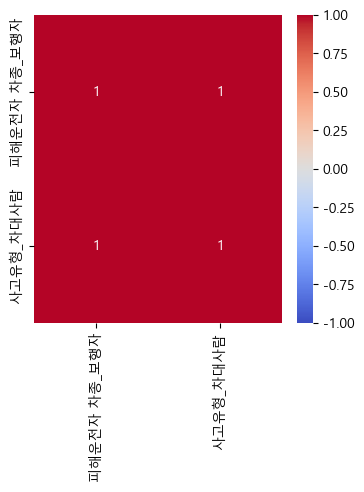

In [407]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

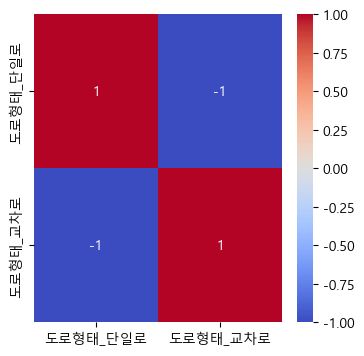

In [408]:
selected_data = data[['도로형태_단일로', '도로형태_교차로']]
corr_matrix = selected_data.corr()
fig, ax = plt.subplots(1, 1, figsize=(4,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

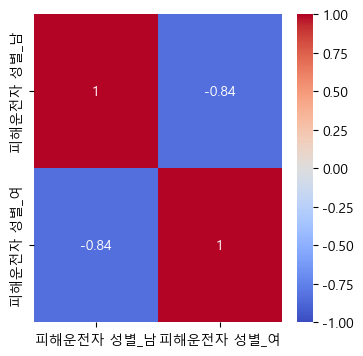

In [409]:
selected_data = data[['피해운전자 성별_남', '피해운전자 성별_여']]
corr_matrix = selected_data.corr()
fig, ax = plt.subplots(1, 1, figsize=(4,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

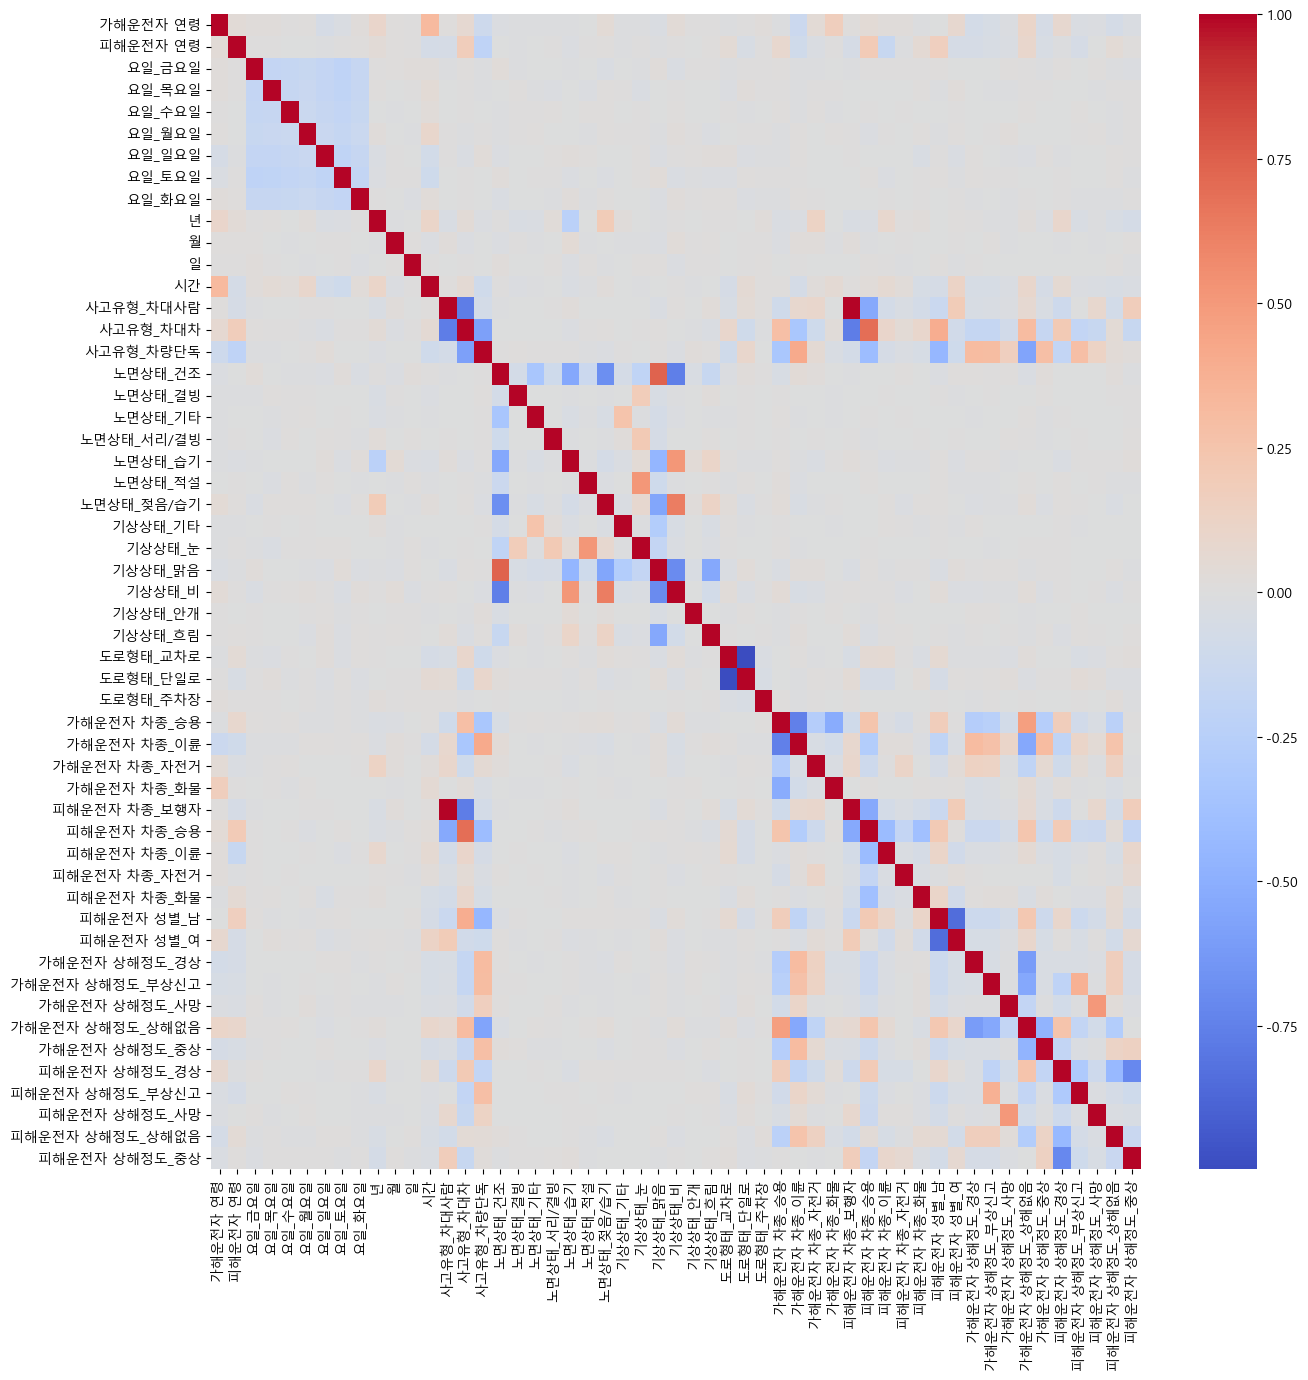

In [386]:
fig, ax = plt.subplots(1, 1, figsize=(15,15))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.show()

In [430]:
data.to_csv('data.csv', index=False)

In [431]:
data.to_csv('data_kor.csv', index=False, encoding='cp949')